## Binary classification for prediction of the compound activity with respect to adenosine A2a receptor

### Almaz Gilmullin 760235219, Anastasiia Krokhina 659711595

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ! pip install tqdm
# from tqdm import tqdm
import joblib
# import os

In [3]:
from sklearn.model_selection import train_test_split
from DataPreparation import DataPreparation

In [4]:
pics = './images'

In [5]:
df = pd.read_csv('./data/balanced_dataframe.csv', index_col=None)
df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,label
0,10.337455,10.337455,0.057778,-1.272753,0.255933,23.375000,505.329,484.161,504.075680,168,...,0,0,0,0,0,0,0,0,0,1
1,10.335047,10.335047,0.059736,-1.271941,0.255933,23.375000,505.329,484.161,504.075680,168,...,0,0,0,0,0,0,0,0,0,1
2,10.333078,10.333078,0.061184,-1.271281,0.255933,23.375000,505.329,484.161,504.075680,168,...,0,0,0,0,0,0,0,0,0,1
3,10.355554,10.355554,0.205346,-1.235039,0.369988,25.218750,440.504,412.280,440.217203,170,...,0,0,0,0,0,0,0,0,0,1
4,6.090409,6.090409,0.226017,0.226017,0.547921,12.285714,362.614,353.542,360.961752,104,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X = df.drop(columns=['label'])
y = df['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y
                                                    )
y_test.value_counts()

label
0    915
1    915
Name: count, dtype: int64

In [8]:
data_preparation = DataPreparation(X_train, X_test, y_train, y_test)

# # get scaled clean data
# # use StandartScaler
X_train, X_test, y_train, y_test = data_preparation.clean_dataset()

### SVC

In [9]:
from numpy import mean
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [11]:
svc = svm.SVC(random_state=0)

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
param_grid = {'C':[1, 10, 100],
              'gamma':[0.01,0.001, 'auto', 'scale'],
              'kernel': ['rbf','linear']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(svc, param_grid, cv=cv, scoring=scoring, refit='AUC', verbose=1, n_jobs=-1)

%time grid.fit(X_train, y_train)

print()
print(grid.best_params_)

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)

score = roc_auc_score(y_test, y_pred)
print("Mean ROC AUC:", score)

Fitting 30 folds for each of 24 candidates, totalling 720 fits


KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
scoring_lr = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

cv_lr = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_lr = GridSearchCV(lr, 
                    param_grid_lr, 
                    cv=cv_lr, 
                    scoring=scoring_lr, 
                    refit='AUC', 
                    verbose=1, 
                    n_jobs=-1)

%time grid_lr.fit(X_train, y_train)

print()
print(grid.best_params_)

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)

score = roc_auc_score(y_test, y_pred)
print("Mean ROC AUC:", score)

In [13]:
y_pred = grid.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
cm = confusion_matrix(y_train, y_pred)
print("Accuracy:", accuracy)

score = roc_auc_score(y_train, y_pred)
print("Mean ROC AUC:", score)

Accuracy: 0.9976580796252927
Mean ROC AUC: 0.9976580796252927


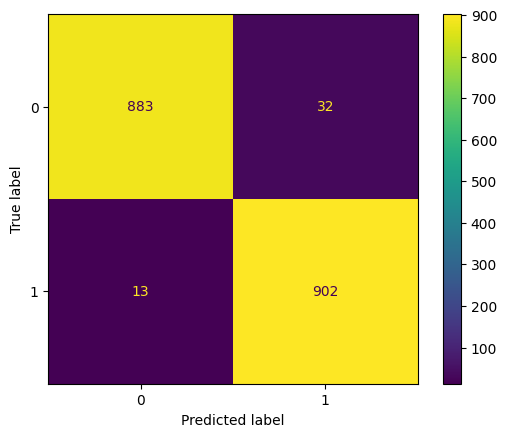

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.show()
# plt.savefig(f'{pics}/conf_scaled.jpg')

# Recheck

In [33]:

svc = svm.SVC(C=100, gamma=0.001)

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)
# print("Accuracy:", accuracy)

# score = roc_auc_score(y_test, y_pred)
# print("Mean ROC AUC:", score)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       283
           1       0.96      0.99      0.97       327

    accuracy                           0.97       610
   macro avg       0.97      0.97      0.97       610
weighted avg       0.97      0.97      0.97       610



In [34]:
svc_filename = f'{path_model}/svc.sav'
joblib.dump(svc, svc_filename)

['./models/svc.sav']

In [35]:
# svc = joblib.load(svc_filename)

### Plotting the result

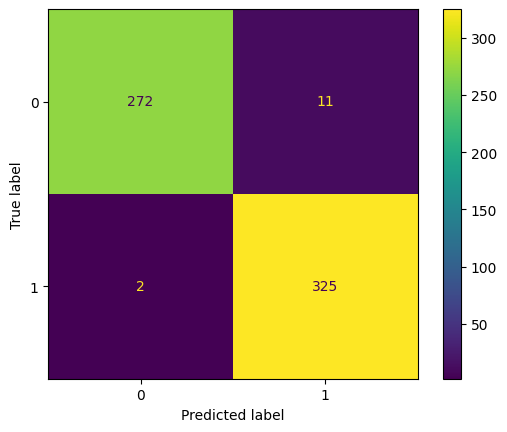

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()
# plt.savefig(f'{pics}/conf_scal.jpg')

### SVC 2

In [37]:
svc_2 = svm.SVC(C=1, gamma=0.0001)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(svc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=3)

svc_2 = svm.SVC(C=1, gamma=0.0001)
accuracy = cross_val_score(svc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, verbose=3)
print('Mean ROC AUC: %.3f' % mean(scores))
print('Accuracy: %.3f' % mean(accuracy))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV] END ................................ score: (test=0.992) total time=   0.6s
[CV] END ................................ score: (test=0.998) total time=   0.6s
[CV] END ................................ score: (test=0.995) total time=   0.5s
[CV] END ................................ score: (test=0.994) total time=   0.5s
[CV] END ................................ score: (test=0.995) total time=   0.5s
[CV] END ................................ score: (test=0.997) total time=   0.5s
[CV] END ................................ score: (test=0.999) total time=   0.6s
[CV] END ................................ score: (test=0.999) total time=   0.6s
[CV] END ................................ score: (test=0.997) total time=   0.4s
[CV] END ................................ score: (test=0.997) total time=   0.4s
[CV] END ................................ score: (test=0.998) total time=   0.4s
[CV] END ................................ score: (test=0.997) total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV] END ................................ score: (test=0.978) total time=   0.5s
[CV] END ................................ score: (test=0.976) total time=   0.5s
[CV] END ................................ score: (test=0.976) total time=   0.4s
[CV] END ................................ score: (test=0.974) total time=   0.4s
[CV] END ................................ score: (test=0.974) total time=   0.4s
[CV] END ................................ score: (test=0.980) total time=   0.5s
[CV] END ................................ score: (test=0.984) total time=   0.5s
[CV] END ................................ score: (test=0.989) total time=   0.6s
[CV] END ................................ score: (test=0.984) total time=   0.4s
[CV] END ................................ score: (test=0.978) total time=   0.5s
[CV] END ................................ score: (test=0.984) total time=   0.4s
[CV] END ................................ score: (test=0.980) total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.9s finished


In [38]:
svc_2_filename = f'{path_model}/svc_2.sav'
joblib.dump(svc_2, svc_2_filename)

['./models/svc_2.sav']

In [39]:
# svc_2 = joblib.load(svc_2_filename)

## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# accuracy_nb = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy_nb)

# score = roc_auc_score(y_test, y_pred)
# print("Mean ROC AUC:", score)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       283
           1       0.90      0.97      0.93       327

    accuracy                           0.92       610
   macro avg       0.93      0.92      0.92       610
weighted avg       0.93      0.92      0.92       610



In [42]:
gaus_filename = f'{path_model}/gaussian.sav'
joblib.dump(nb, gaus_filename)

['./models/gaussian.sav']

In [43]:
# nb = joblib.load(gaus_filename)

### Logistic Regression

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression

In [45]:
SEED = 42

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

lr = Pipeline([('p_trans', PowerTransformer(method='yeo-johnson', standardize=True)),
               ('lr', LogisticRegression(solver='liblinear',
                                         penalty='l1',
                                         max_iter=200,
                                         class_weight='balanced',
                                         random_state=SEED)
               )])

unscaled_lr = Pipeline([('lr', LogisticRegression(solver='liblinear',
                                         penalty='l1',
                                         max_iter=200,
                                         class_weight='balanced',
                                         random_state=SEED)
               )])

scores = cross_val_score(estimator=lr, X=X_train, y=y_train, 
                         cv=skf, scoring='roc_auc', n_jobs=-1)

print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores, scores.mean(), scores.std()))

lr.fit(X_train, y_train);

scores = [0.98528294 0.98949516 0.98788924 0.98731485 0.98613692] 
mean score = 0.98722 +/- 0.00145


In [46]:
df_score = pd.DataFrame(data={'score': lr['lr'].coef_[0]}, index=X.columns).sort_values(by='score')
# df.plot(kind='barh', grid=True, figsize=(6,6), legend=False)

In [47]:
df_score

,score
BCUT2D_CHGLO,-3.223946
Kappa2,-2.523274
Kappa3,-1.697025
Chi4n,-1.641638
PEOE_VSA9,-1.397618
...,...
PEOE_VSA12,1.145546
SlogP_VSA12,1.727905
PEOE_VSA5,2.171783
PEOE_VSA7,2.500676


In [48]:
y_pred = lr.predict(X_test)

# score = roc_auc_score(y_test, y_pred)
# print("Mean ROC AUC:", score)

# accuracy_nb = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy_nb)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       283
           1       0.94      0.98      0.96       327

    accuracy                           0.96       610
   macro avg       0.96      0.95      0.96       610
weighted avg       0.96      0.96      0.96       610



#### We have high accuracy and high AUC score in classification, it's better to go to regression to better progress

In [50]:
lofit_filename = f'{path_model}/svc.sav'
joblib.dump(lr, lofit_filename)

['./models/svc.sav']

In [51]:
# lr = joblib.load(logit_filename)

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
values = [i for i in range(1, 21)]
train_scores = []
test_scores = []
for i in values:
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(X_train, y_train)

    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.899, test: 0.887
>2, train: 0.925, test: 0.903
>3, train: 0.948, test: 0.933
>4, train: 0.954, test: 0.933
>5, train: 0.965, test: 0.941
>6, train: 0.971, test: 0.943
>7, train: 0.976, test: 0.946
>8, train: 0.981, test: 0.952
>9, train: 0.985, test: 0.956
>10, train: 0.988, test: 0.949
>11, train: 0.991, test: 0.946
>12, train: 0.993, test: 0.951
>13, train: 0.995, test: 0.944
>14, train: 0.995, test: 0.949
>15, train: 0.996, test: 0.948
>16, train: 0.997, test: 0.939
>17, train: 0.997, test: 0.946
>18, train: 0.997, test: 0.952
>19, train: 0.997, test: 0.949
>20, train: 0.998, test: 0.956


## Plot

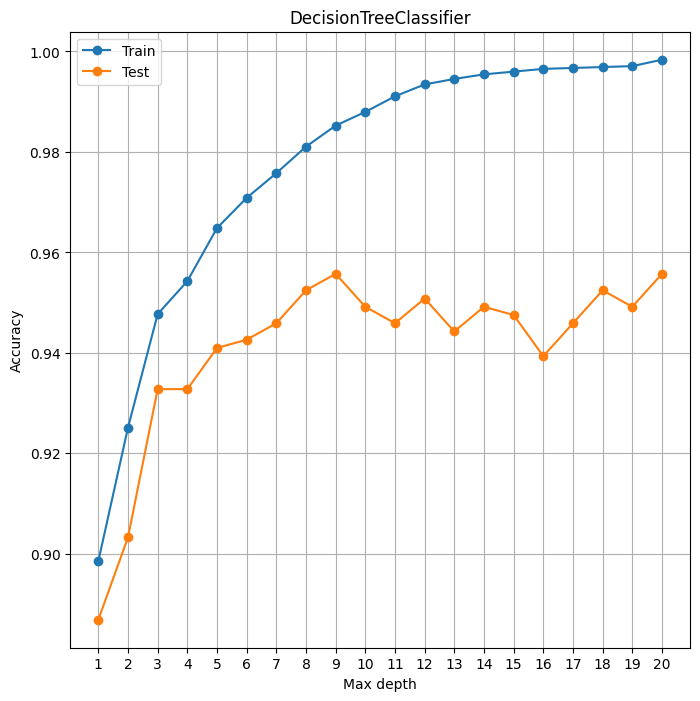

In [54]:
plt.figure(1, figsize=(8,8))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xticks(range(1, 21))
plt.grid()
plt.title('DecisionTreeClassifier')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
# plt.show()
plt.savefig(f'{pics}/clf_dtree_balanced.png')

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

values = [i for i in range(1, 21)]
train_scores = []
test_scores = []
for i in values:
    rf = RandomForestClassifier(max_depth=i)

    model.fit(X_train, y_train)

    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.997, test: 0.941
>2, train: 0.997, test: 0.949
>3, train: 0.997, test: 0.948
>4, train: 0.997, test: 0.944
>5, train: 0.997, test: 0.948
>6, train: 0.997, test: 0.952
>7, train: 0.997, test: 0.949
>8, train: 0.997, test: 0.946
>9, train: 0.997, test: 0.952
>10, train: 0.997, test: 0.951
>11, train: 0.997, test: 0.951
>12, train: 0.998, test: 0.954
>13, train: 0.997, test: 0.951
>14, train: 0.997, test: 0.948
>15, train: 0.997, test: 0.952
>16, train: 0.997, test: 0.946
>17, train: 0.997, test: 0.939
>18, train: 0.997, test: 0.949
>19, train: 0.997, test: 0.949
>20, train: 0.997, test: 0.949


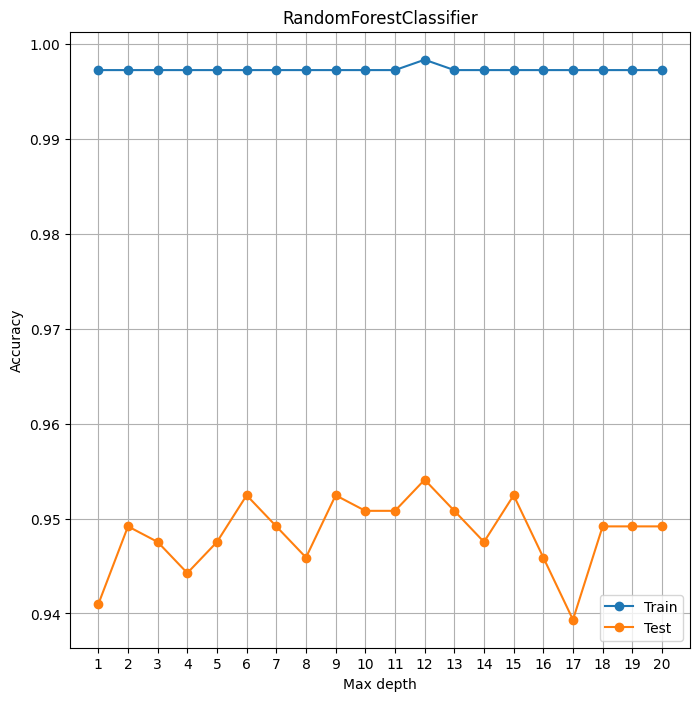

In [56]:
plt.figure(1, figsize=(8,8))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xticks(range(1, 21))
plt.grid()
plt.title('RandomForestClassifier')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.show()
# plt.savefig(f'{pics}/clf_rf_balanced.png')

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9655737704918033